# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import numpy as np

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [2]:
# Your code here
cutoff = 50
ames2list = []
ames2 = ames.copy()
for col, dtype in zip(ames.columns, ames.dtypes):
    if dtype != 'object':
        #print(col,',',dtype,' ,',len(ames[col].unique()),',',len(ames[col].unique()))
        if len(ames[col].unique()) > cutoff:
            #print(col,',',dtype,' ,',len(ames[col].unique()),',',len(ames[col].unique()))
            ames2list.append(col)
for col in ames.columns:
    if col in ames2list:
        pass
    else:
        ames2 = ames2.drop([col], axis=1)

#also, since ID isn't really a continuous variable that would influence SalePrice,        
ames2=ames2.drop(['Id'],axis=1)
            
#display(ames)
display(ames2)
#display(ames)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,1647,1999.0,460,0,40,0,0,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,2073,1978.0,500,349,0,0,0,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,2340,1941.0,252,0,60,0,0,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,1078,1950.0,240,366,0,112,0,142125


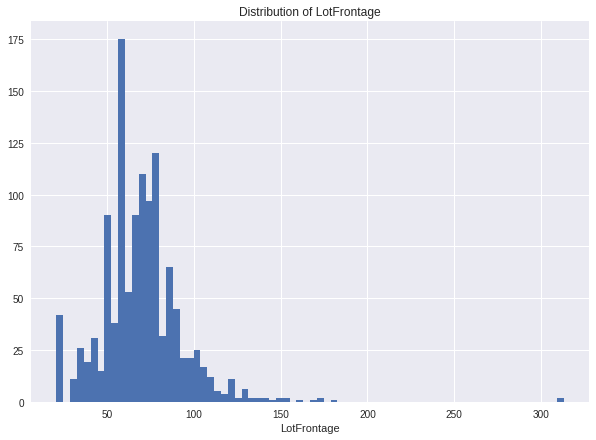

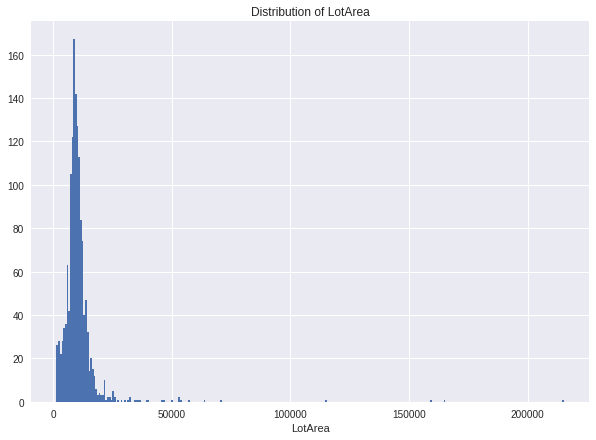

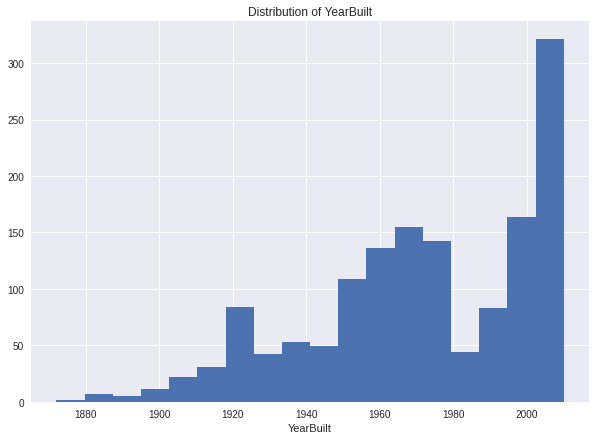

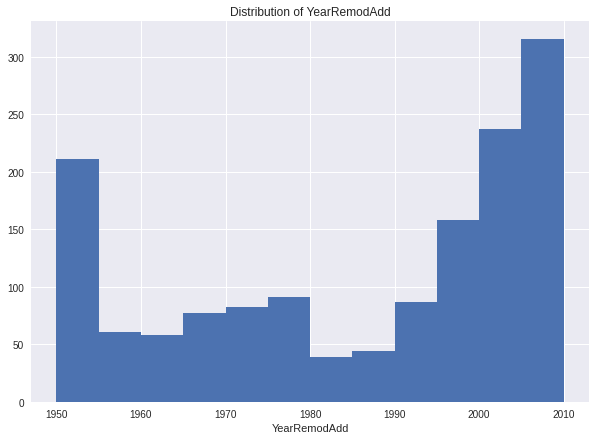

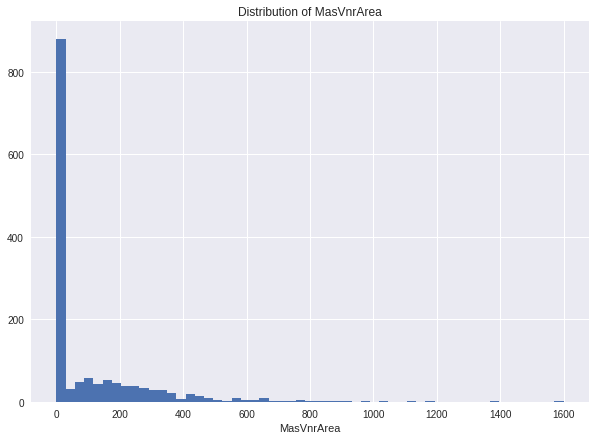

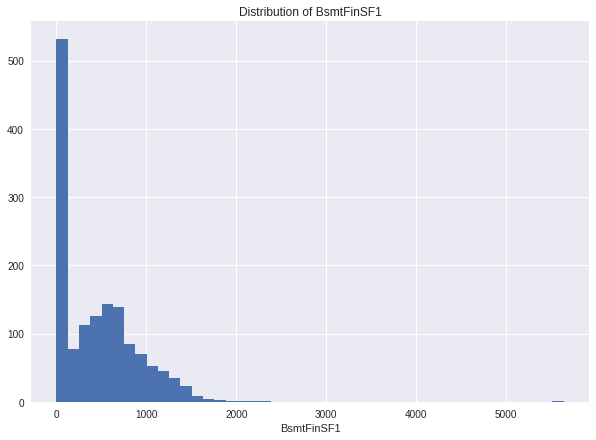

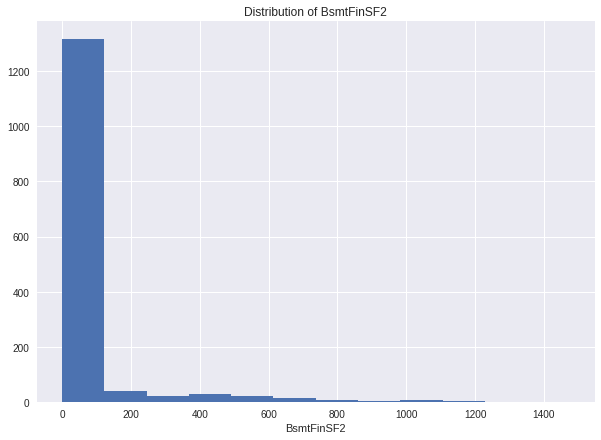

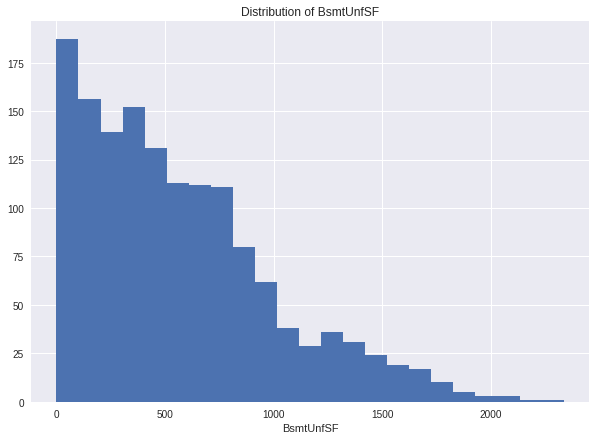

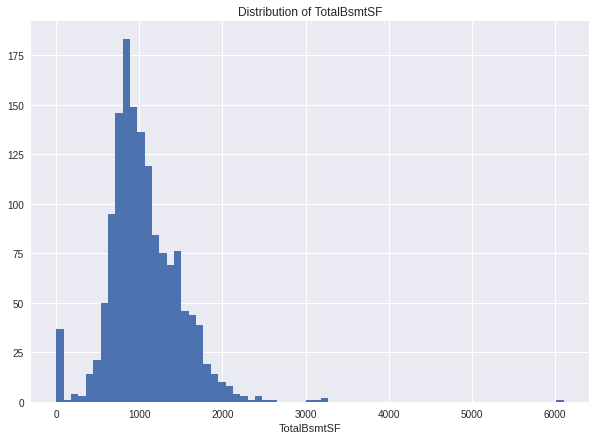

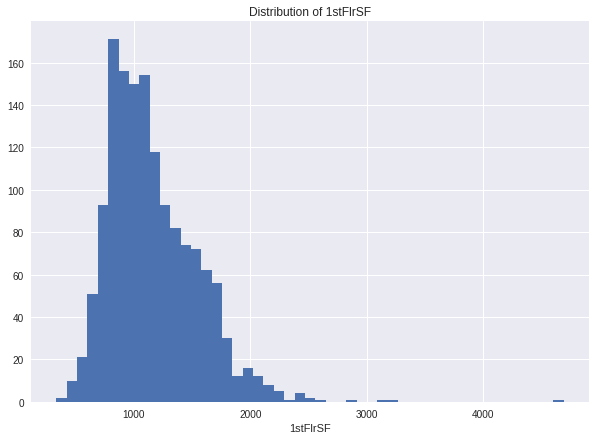

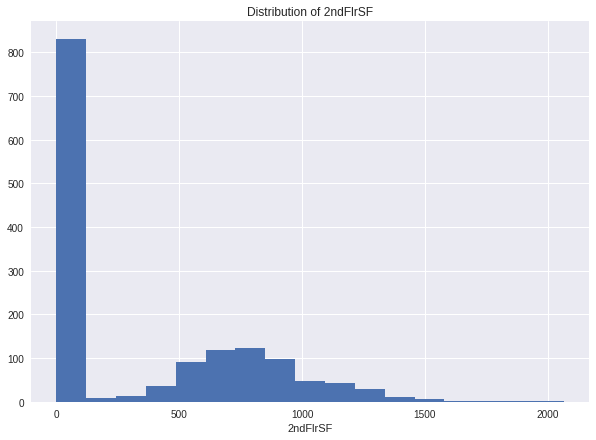

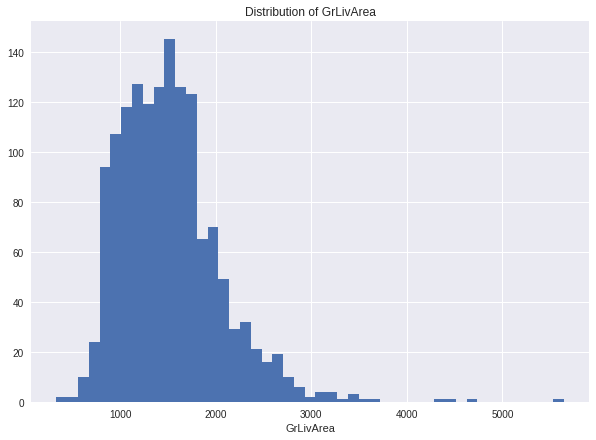

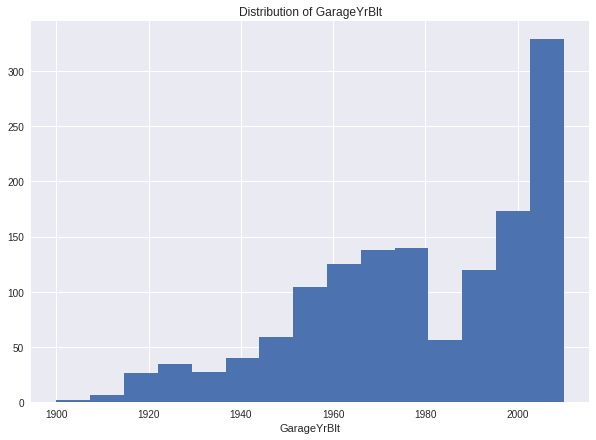

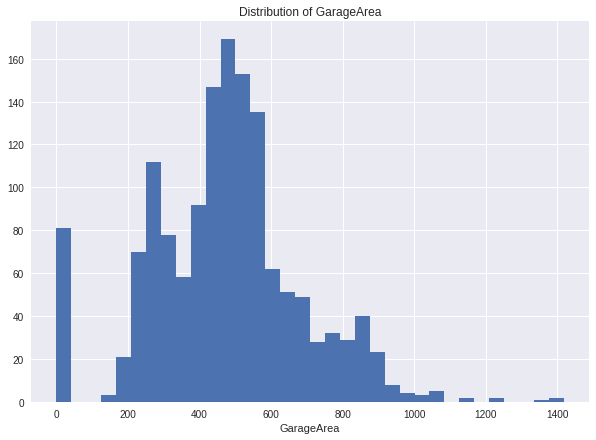

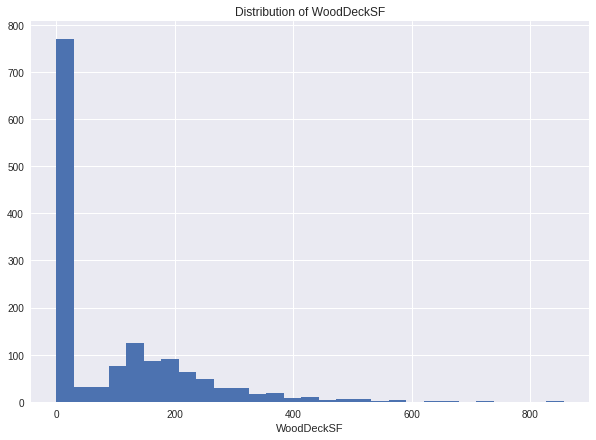

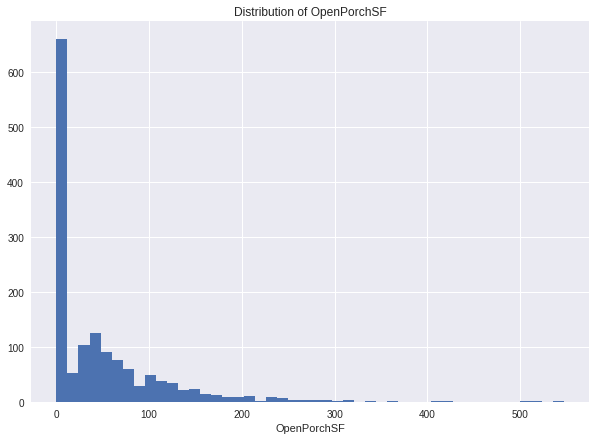

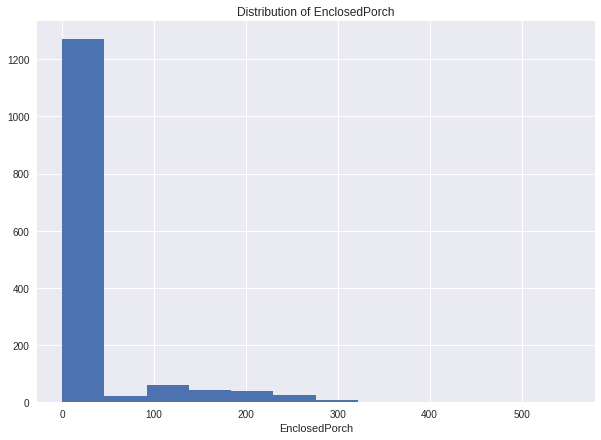

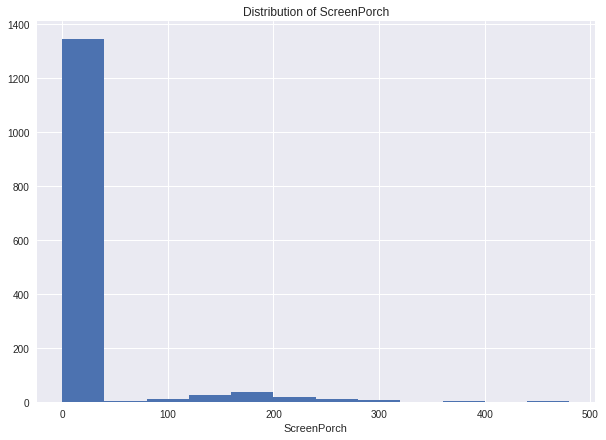

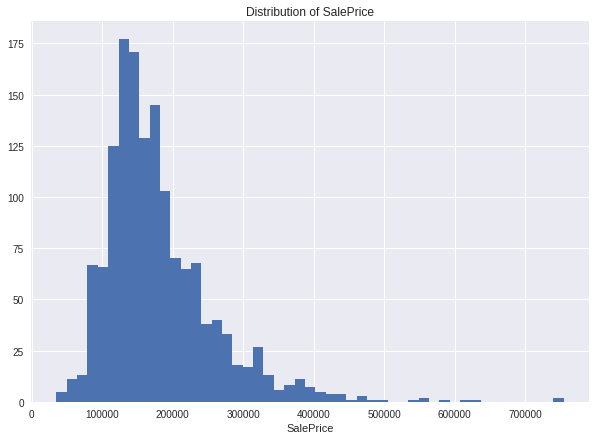

In [3]:
#pd.plotting.scatter_matrix(ames2);
for col in ames2.columns:
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.hist(ames2[col], bins='auto')
    ax.set_title('Distribution of {}'.format(col))
    ax.set_xlabel('{}'.format(col))
    #ax.axvline(df['SalePrice'].mean(), color='black');
zero_heavy=['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF',"GarageArea",'WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch']

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [4]:
# Select non zero-inflated continuous features as ames_cont
ames_cont = ames2.copy()
for col in ames_cont.columns:
    if col in zero_heavy:
        ames_cont = ames_cont.drop([col], axis=1)
ames_cont

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,GarageYrBlt,SalePrice
0,65.0,8450,2003,2003,856,1710,2003.0,208500
1,80.0,9600,1976,1976,1262,1262,1976.0,181500
2,68.0,11250,2001,2002,920,1786,2001.0,223500
3,60.0,9550,1915,1970,961,1717,1998.0,140000
4,84.0,14260,2000,2000,1145,2198,2000.0,250000
...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,953,1647,1999.0,175000
1456,85.0,13175,1978,1988,2073,2073,1978.0,210000
1457,66.0,9042,1941,2006,1188,2340,1941.0,266500
1458,68.0,9717,1950,1996,1078,1078,1950.0,142125


## Perform log transformations for the variables where it makes sense

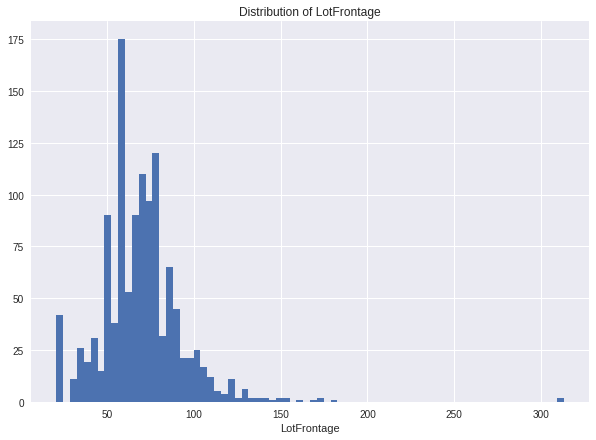

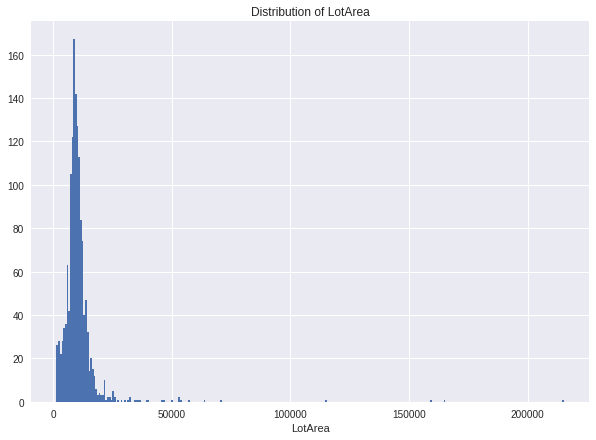

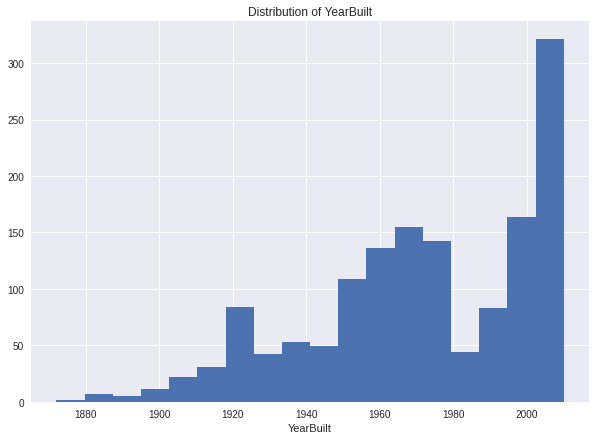

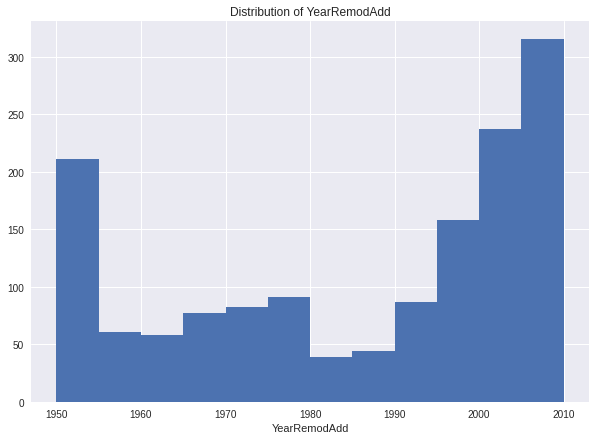

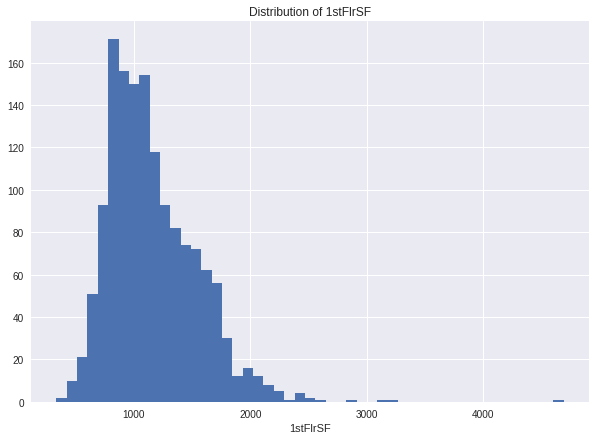

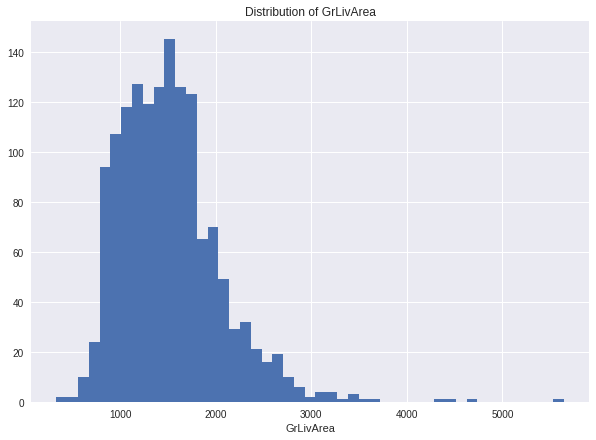

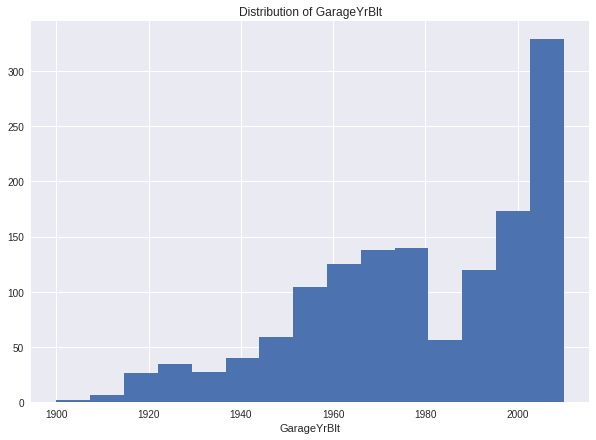

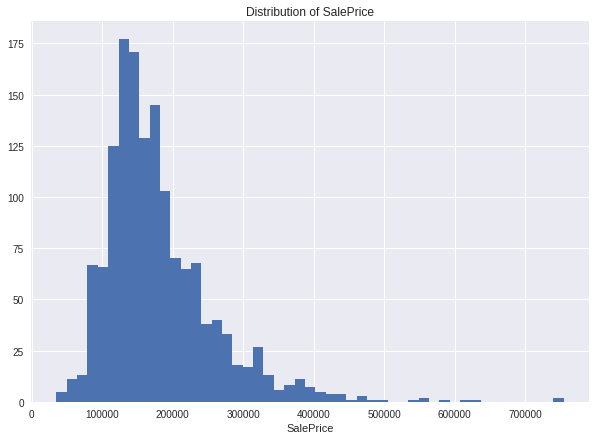

In [5]:
# Your code here
for col in ames_cont.columns:
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.hist(ames_cont[col], bins='auto')
    ax.set_title('Distribution of {}'.format(col))
    ax.set_xlabel('{}'.format(col))
log_trans=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice',
          'YearBuilt','YearRemodAdd','GarageYrBlt']


LotFrontage
LotArea
YearBuilt
YearRemodAdd
1stFlrSF
GrLivArea
GarageYrBlt
SalePrice


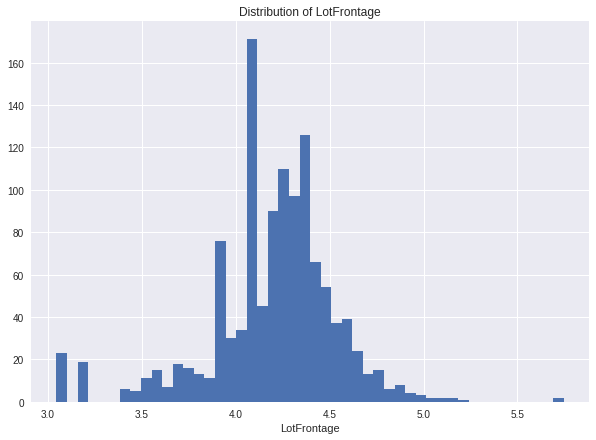

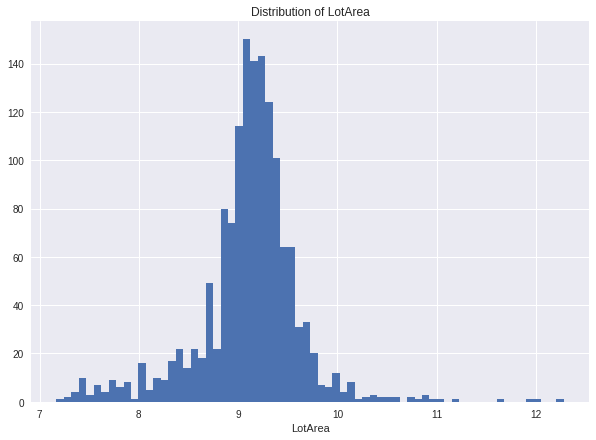

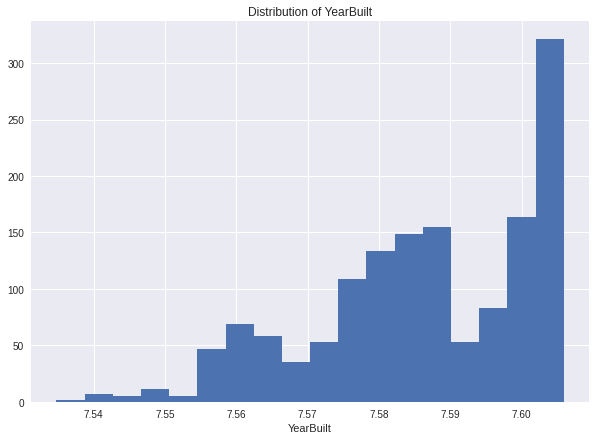

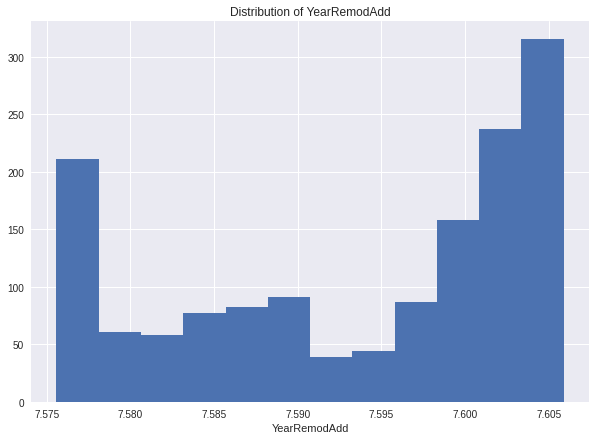

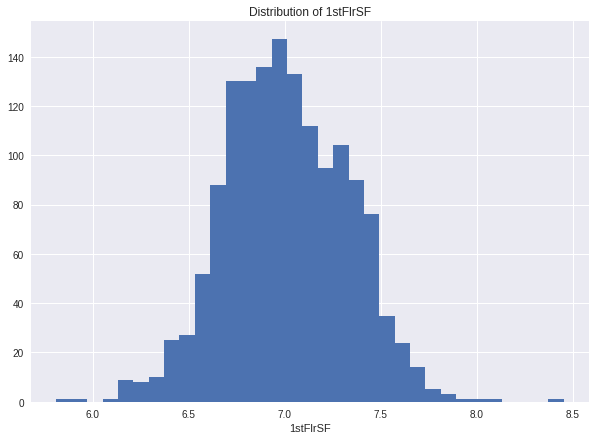

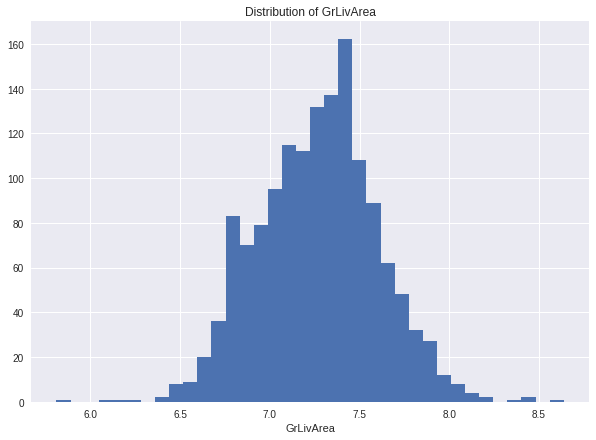

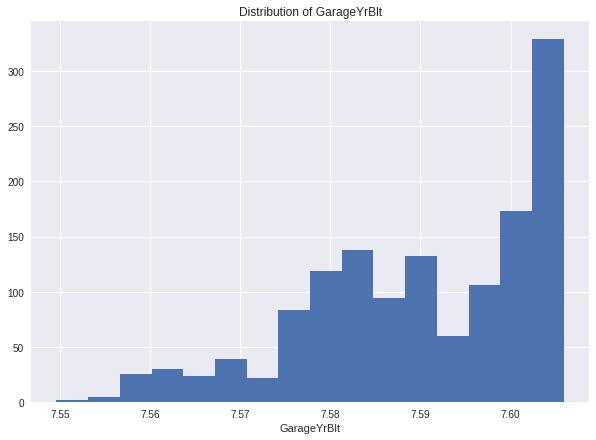

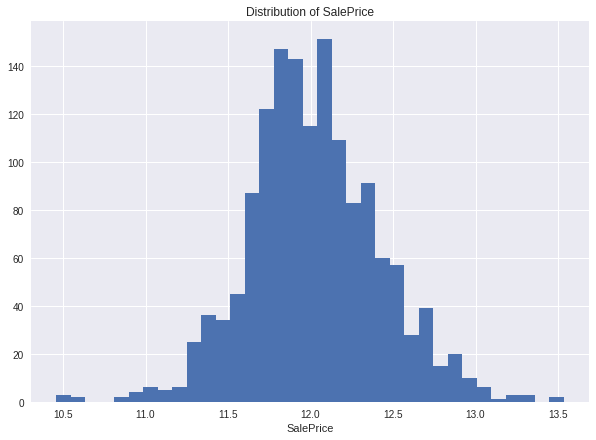

In [6]:
for col in log_trans:
    #print(col)
    ames_cont[col] = ames_cont[col].map(lambda x: np.log(x))
for col in ames_cont.columns:
    fig, ax = plt.subplots(figsize=(10, 7))
    print(col)
    ax.hist(ames_cont[col], bins='auto')
    ax.set_title('Distribution of {}'.format(col))
    ax.set_xlabel('{}'.format(col))


## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

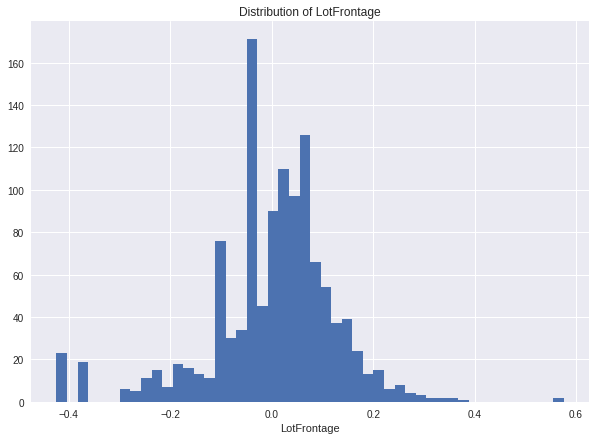

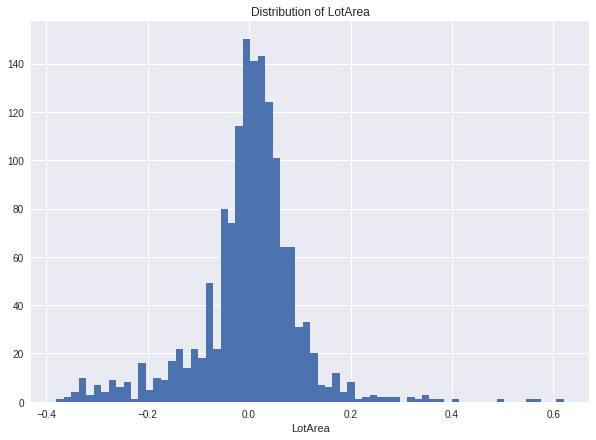

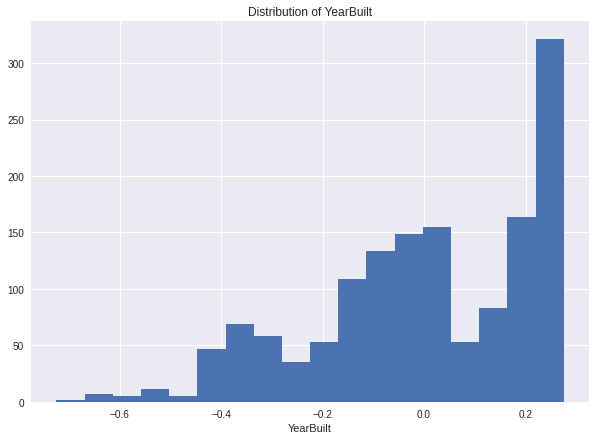

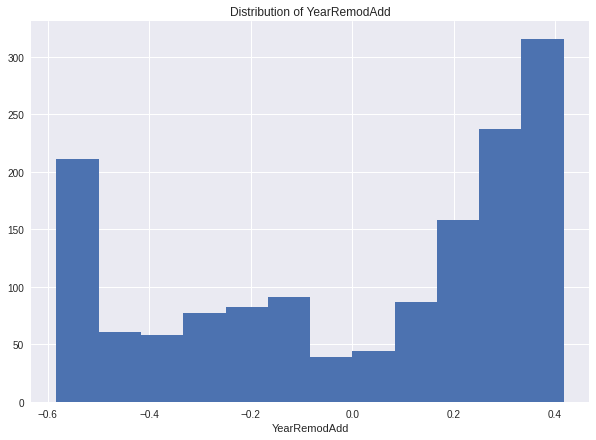

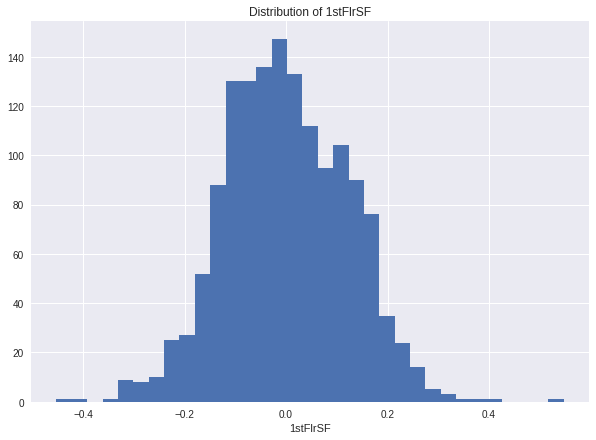

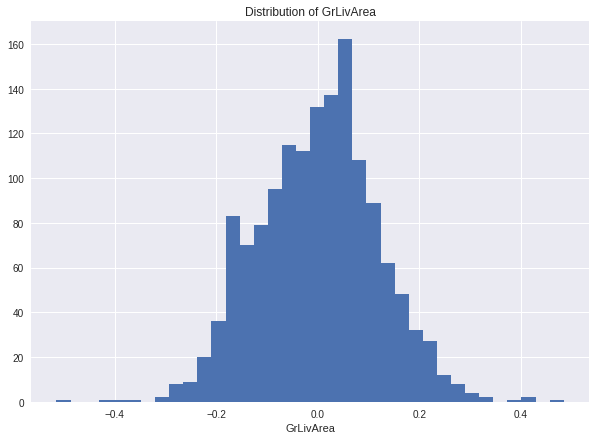

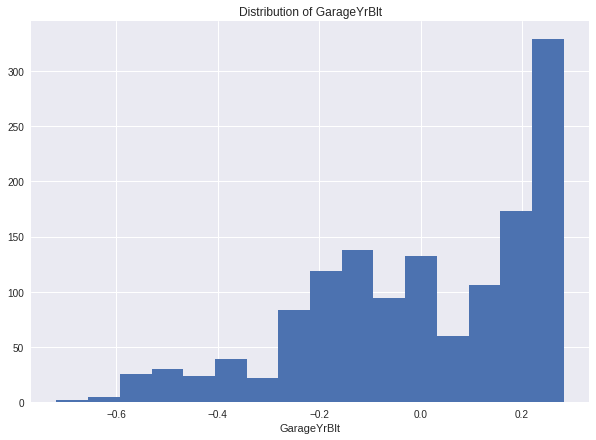

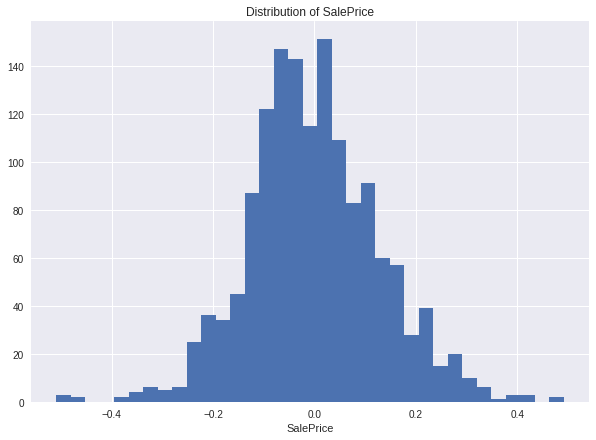

In [7]:
# Your code here
features_final=ames_cont.copy()
for col in features_final.columns:
    #print(col)
    c = features_final[col]
    scaled_col = (c - np.mean(c)) / (max(c) - min(c))
    features_final[col] = scaled_col

for col in features_final.columns:
    fig, ax = plt.subplots(figsize=(10, 7))
    #print(col)
    ax.hist(features_final[col], bins='auto')
    ax.set_title('Distribution of {}'.format(col))
    ax.set_xlabel('{}'.format(col))

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!